<a href="https://colab.research.google.com/github/FMurunga/Real-Estate-Price-Prediction/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import seaborn as sn
import io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
#read the csv file into a pandas df from local machine
#from google.colab import files
#uploaded = files.upload()
#df = pd.read_csv(io.StringIO(uploaded['Bengaluru_House_Data.csv'].decode('utf-8')))
#df


In [ ]:
df = pd.read_csv('https://raw.github.com/FMurunga/DataScience-Projects/main/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
#check the shape of your data i.e no of rows & no of colums
df.shape
#the data set has 13320 rows and 9 columns

(13320, 9)

In [ ]:
#examine the areatype feature
#group by area type and aggregate the count
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
#drop some columns that may not affect the pricing e.g let's say availability column
df1=df.drop(['area_type','society','balcony','availability'], axis= 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


**Data Cleaning Process**
Applying various data cleaning techniques

In [ ]:
#check the no of columns with null values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
#since the no of null values compared to the 13000 data in the dataset is smaller, you can safely drop the rows with null values
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df2.shape

(13246, 5)

In [ ]:
#explore the size feature
#check for unique values in the column data
df2['size'].unique()

#some values are represented differently yet mean the same thing e.g 4BHK and 4 Bedroom

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
#To solve the above problem
#create a new column based on the size column a python lambda function to assign the first value of the size column e.g 3 as the value of BHK
df2['bedrooms'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df2['bedrooms'].unique()
#shows the different no if bedrooms available for the homes in the dataset

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
#check for homes with greater than 20 bedrooms
df2[df2.bedrooms>20]
#Notice: a 43 bedroomed house is 2400 sqft which is illogical
#thus explore the total_sqft feature

,location,size,total_sqft,bath,price,bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df2['total_sqft'].unique()
#Notice there is a range value '1133 - 1384' that needs to be converted into a single number

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
#convert the range value in total_sqft feature into a single number
#first check the variations of values available in the total_sqft column
def is_float(x):
        #try to onvert a value in total_sqft into float
  try:
    float(x)
       #throw an exception if not
  except:
    return False
  return True

In [ ]:
#get all the values that are not float values
df2[~df2['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
#Tackle the range values
#A function that takes the input string x of column total_sqft
#splits the values using - as tokens
#if the tokens are two numbers i.e of the range values then it should convert the tokens into a float number and take the average of the two numbers
#if its a single no, convert it into a float
#if not ignore
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens)== 2:
    return(float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
#Test the function
convert_sqft_to_num('2166')
#for a single no it returns a float value

2166.0

In [ ]:
convert_sqft_to_num('2100 - 2850')
#for a range it returns the average

2475.0

In [ ]:
convert_sqft_to_num('34.46Sq. Meter')
#returns nothing

In [ ]:
#Apply the function to the total_sqft column and create a new dataframe which is a copy of the previous dataframe
df3 = df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()


,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
#check indexx 30 on the datataframe
df3.loc[30]
#the total sqft is 2475,previously it was a rage value

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bedrooms              4
Name: 30, dtype: object

Dataset is cleaned now compared to what was uploaded!

**Feature Engineering and Dimensionality Reduction techniques**

In [ ]:
df3.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
#copy the df into a new df and create the price per sqft column
#NB: the price per sqft is an important attribute in Real Estate,rem to convert the price(multiply by 100000)
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
#Explore the loccations olumn which is  a categorical feature
len(df4['location'].unique())
#from the dataset we have 1300 locations which is a huge number thus is a high dimensionality problem

1304

In [ ]:
#strip extra spaces from the location variable
df4.location = df4.location.apply(lambda x: x.strip())
#get stats of the location varibale
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats
#the whitefield location has the max no of datapoints  of 535 in the dataset

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [ ]:
#To solve the high dimensionality problem,create a cluster for the locations
#we can have  a thresold that every location that has below 10 datapoints can be defined as 'other' in the location column
#check how many locations have less than 10 datapoints
len(location_stats[location_stats<=10])

#we have 1052 locations with less than 10 datapoints

1052

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [ ]:
len(df4.location.unique())

1293

In [ ]:
df4.location =df4.location.apply(lambda x: 'other'if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

**Outlier Detection and Outiler Removal**
Outliers are datapoints that might be errors or with extreme variations that should be removed

Techniques for outlier removal: standard deviation or even just domain knowledge

In [ ]:
#in real estate a typical sqft per bedroom is probably 300, thus 300 is a typical threshold. use this criteria to examine the dataset
df4[df4.total_sqft/df4.bedrooms<300].head()
#from this you can identify some outliers such as a 600sqft home with 8 bedrooms, or even a 1020 sqft home with 6 bedrooms which are clearly anomalies that can be removed

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
df4.shape

(13246, 7)

In [ ]:
#create a new df to remove outliers
df5 = df4[~(df4.total_sqft/df4.bedrooms<300)]
df5.shape

(12502, 7)

In [ ]:
#check price per sqft feature for any outliers
df5.price_per_sqft.describe()

#from domain knowledge,the 176470 price is too high for a place like begaluru making it an outlier

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
#Find mean and standard deviation per location using the subdataframe and filter out anything beyond the std
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        #filter out anything beyond the std ie anything beyong m+st, and less than m+st
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

In [ ]:
df6.head(100)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
95,7th Phase JP Nagar,2 BHK,1175.0,2.0,82.0,2,6978.723404
96,7th Phase JP Nagar,3 BHK,1400.0,2.0,95.0,3,6785.714286
97,7th Phase JP Nagar,3 BHK,2225.0,3.0,160.0,3,7191.011236
98,7th Phase JP Nagar,2 BHK,1050.0,2.0,71.0,2,6761.904762


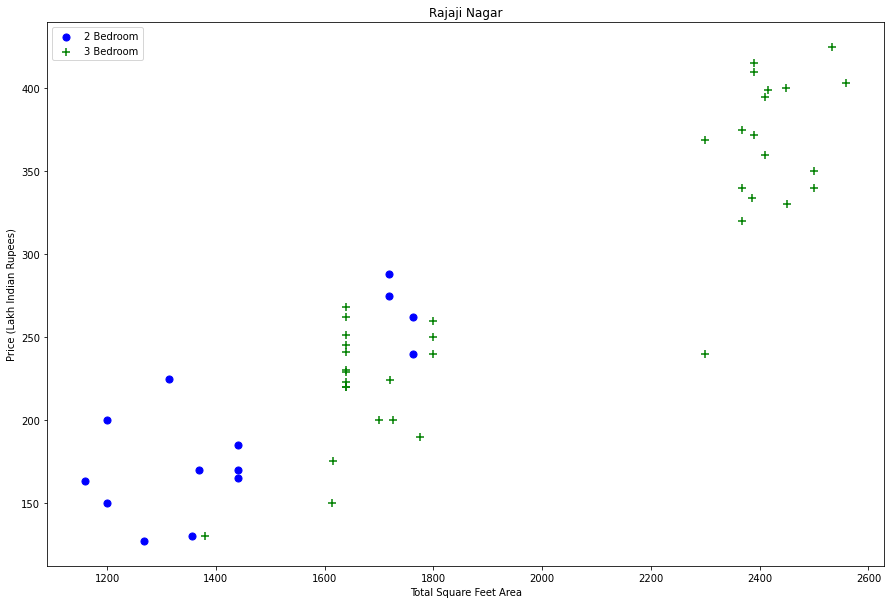

In [ ]:
#check if the prices for 3bedroomed apartments are more  than 2 brs of the same sqft area
#plot a scatter plot to visualize price per sqft for 2br and 3br
def plot_scatter_chart(df,location):
  #create two dataframes to store 2bedrooms and 3bedrooms in the same location
  br2 = df[(df.location==location) & (df.bedrooms==2)]
  br3 = df[(df.location==location) & (df.bedrooms==3)]
  #create a scatter plot to represent the apartments
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(br2.total_sqft,br2.price,color='blue',label='2 Bedroom', s=50)
  plt.scatter(br3.total_sqft,br3.price,marker='+', color='green',label='3 Bedroom', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Rupees)")
  plt.title(location)
  plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

#note that some 2brs houses have higher prices than 3bbedroomhouses of the same square foot area thus are outliers


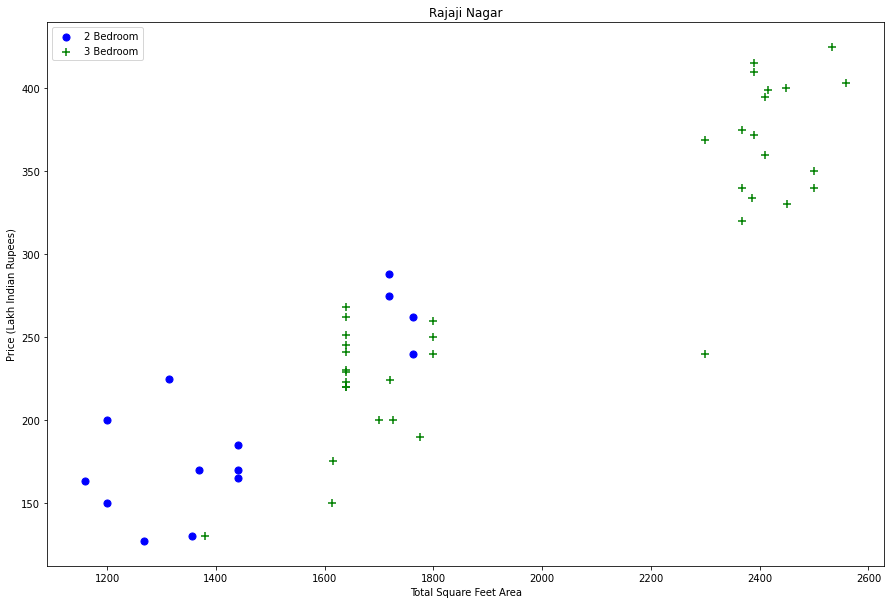

In [ ]:
plot_scatter_chart(df6,"Rajaji Nagar")

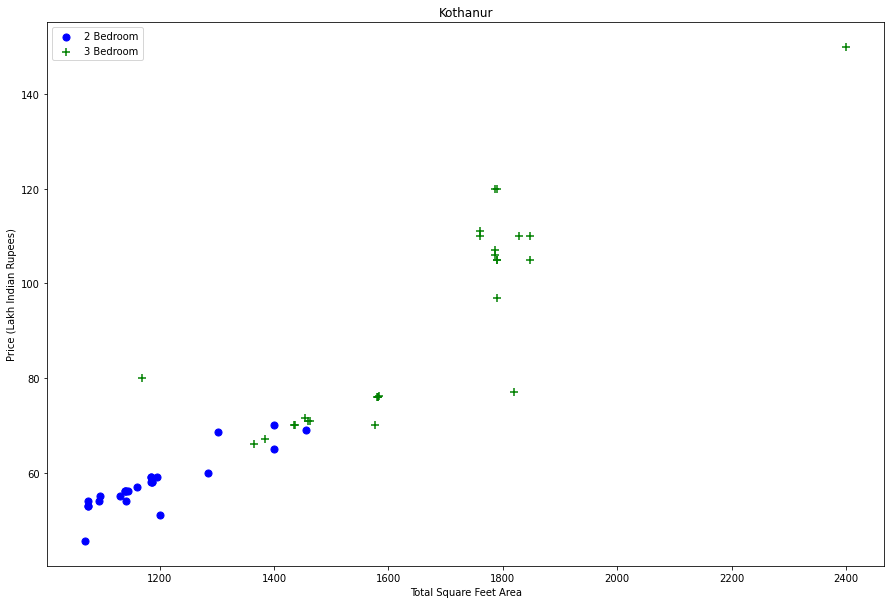

In [ ]:
plot_scatter_chart(df6,"Kothanur")

Remove properties of the same location where e.g the price of a 3br house is less than the price of 2br house of the same square foot area
Build a dictionary for stats per bedroom  for every location

In [ ]:
def remove_bedrooms_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
            bedroom_stats[bedrooms] = {
                'mean': np.mean(bedrooms_df.price_per_sqft),
                'std': np.std(bedrooms_df.price_per_sqft),
                'count': bedrooms_df.shape[0]
            }
        for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
            stats = bedroom_stats.get(bedrooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedrooms_df[bedrooms_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [ ]:
df7 = remove_bedrooms_outliers(df6)
df7.shape

(7329, 7)

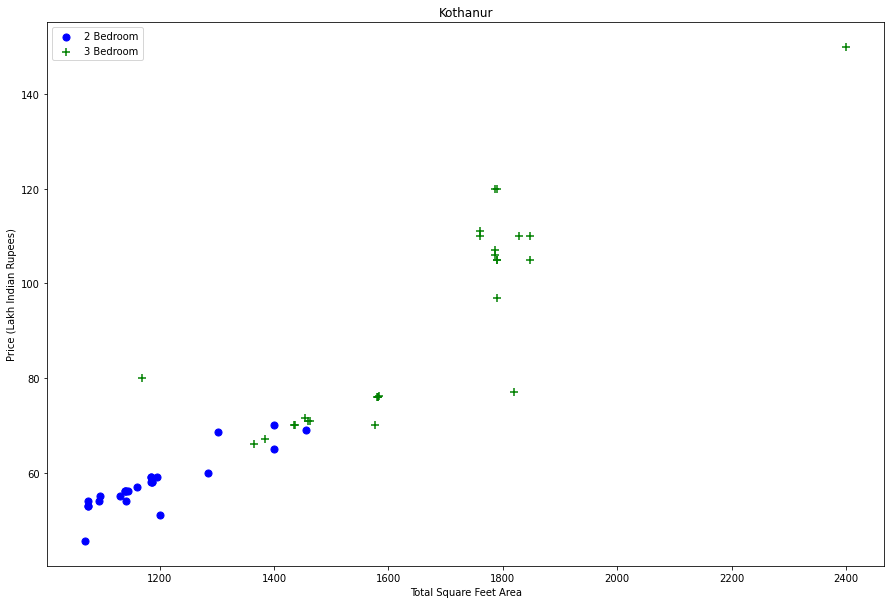

In [ ]:
plot_scatter_chart(df6,"Kothanur")

Text(0, 0.5, 'Count')

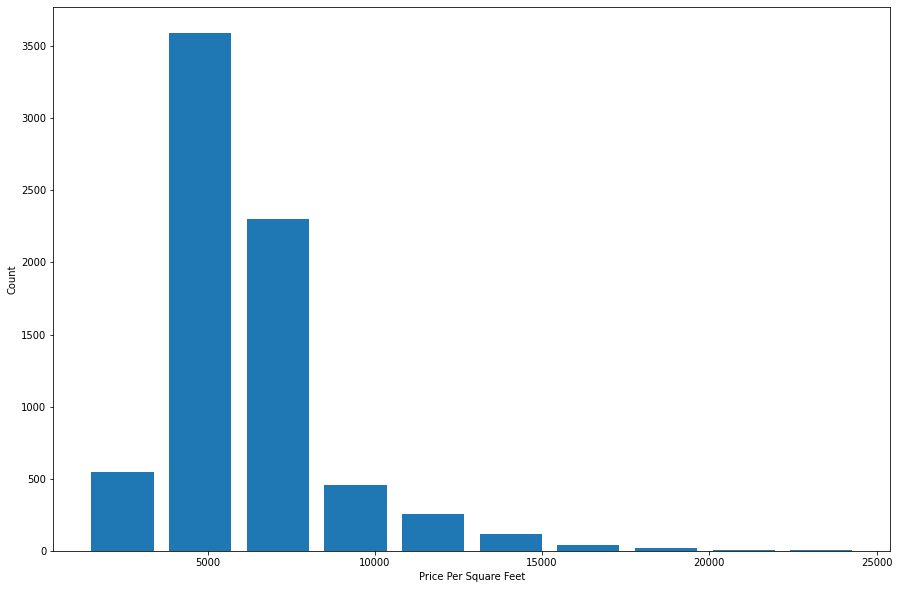

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
#Most properties have a price per sqft of 5000 rupees

In [ ]:
#Explore the bath feature
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df7[df7.bath>10]
#some houses have a more bathrooms than  bedrooms

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [ ]:
#identify the outliers under the bathroom feature
df7[df7.bath > df7.bedrooms+2]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
#remove the outliers
df8 = df7[df7.bath < df7.bedrooms+2]
df8.shape

(7251, 7)

In [ ]:
#remove unnecessary features
df9 = df8.drop(['size','price_per_sqft'], axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


**Model Building**
1. Encode data: Convert area_type and location to numerical values

In [ ]:

dummies=pd.get_dummies(data=df9, columns=[ 'location'])
dummies.head()

,total_sqft,bath,price,bedrooms,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10= pd.concat([df9,dummies.drop('location_other',axis='columns')],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bedrooms,total_sqft,bath,price,bedrooms,location_1st Block Jayanagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,2850.0,4.0,428.0,4,1,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1630.0,3.0,194.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1875.0,2.0,235.0,3,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11= df10.drop('location', axis='columns')
df11.head(2)

,total_sqft,bath,price,bedrooms,total_sqft,bath,price,bedrooms,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,428.0,4,2850.0,4.0,428.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1630.0,3.0,194.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11= df10.drop('location', axis='columns')
df11.head(2)

,total_sqft,bath,price,bedrooms,total_sqft,bath,price,bedrooms,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,428.0,4,2850.0,4.0,428.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1630.0,3.0,194.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11.shape

(7251, 249)

In [ ]:
X = df11.drop('price',axis='columns')
X.head(2)

,total_sqft,bath,bedrooms,total_sqft,bath,bedrooms,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,4,2850.0,4.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1630.0,3.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y =df11.price
Y.head()

,price,price
0,428.0,428.0
1,194.0,194.0
2,235.0,235.0
3,130.0,130.0
4,148.0,148.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y,random_state=10,test_size=0.2)

In [ ]:
print(len(X_train))
print(len(x_test))
print(len(Y_train))
print(len(y_test))

5800
1451
5800
1451


In [ ]:
#Linear regression Model
from sklearn.linear_model import LinearRegression
lr_cf=LinearRegression()
lr_cf.fit(X_train,Y_train)
lr_cf.score(x_test,y_test)

0.8452277697874366

In [ ]:
#K-Fold Cross Validation Model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([ 0.82431891,  0.76693525, -0.19196854,  0.80837764,  0.83387312])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
#find the best regression algorithm also parameters
def find_best_model_gridsearchcv(X,Y):
  #create a dictionary of the models
    algos= {
        'linear regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        'decision tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
        
    }
    scores = []
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
      gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
      gs.fit(X,Y)
      scores.append({
          'model':algo_name,
          'best_score':gs.best_score_,
          'best_params':gs.best_params_
      })
      return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_gridsearchcv(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear regression,0.818397,{'normalize': True}


Linear regressin : score: 0.818397
Lasso regressor:score:0.687429
Decision tress: score0.72874

Thus linear regression is the best model for this

In [ ]:
X.columns

Index(['total_sqft', 'bath', 'bedrooms', 'total_sqft', 'bath', 'bedrooms',
       'location_1st Block Jayanagar', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=247)

In [ ]:
np.where(X.columns=='location_2nd Stage Nagarbhavi')[0][0]

9

In [ ]:
#Function to predict price based on location
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location)[0][0]
  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index>=0:
    x[loc_index]=1

  return lr_cf.predict([x])[0]

In [ ]:
predict_price('location_Yelahanka',1000,2,2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3.58733856, 3.58733856])

In [ ]:
predict_price('location_1st Block Jayanagar',1000,3,3)
#price is 160.63 rupees

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([160.63121855, 160.63121855])

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
import pickle
with open('bengaluru_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_cf,f)

In [ ]:
from google.colab import files 
files.download("bengaluru_home_prices_model.pickle")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#import pickle
#file_name='bengaluru_home_prices_model.pickle'
#f = open('bengaluru_home_prices_model.pickle','wb')
#pickle.dump(lr_cf,f)
#f.close()

In [ ]:
#export data columns into a json file
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))


In [ ]:
from google.colab import files 
files.download("columns.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>